# Introduction
<p>This my very first python 'Data Science' project from DataCamp.</p>
<p>In this project, I will be analyzing a fascinating dataset on every single lego block that has ever been built! </p>
<p>The data for this analysis was sourced from the rebrickable.com lego database and it was downloaded in a csv format. The files on the website are updated automatically generated at the end of every month and the features of the new data you'll source may vary to the one used in this analysis because of the variation in the dates. The data used in this project is from May 2019... 2019-06-01 12:27:47 </p>


![title](lego.jpeg)

# Reading the Data and Exploring it further
<p>The initial data to be used is the 'colors' logo dataset on the Rebrickable website. The usual python module for importing csv data files into python is Pandas' read_csv. This will be imported and the next bit of analysis will begin. </p>

## First Task is to Read the Data


<p>The colors dataset is stored in the Lego data file on the local hard disk. This is the same path to the local repo</p>

In [2]:
#import modules
import pandas as pd

#Read the colors dataset
colors=pd.read_csv('colors.csv')

#Print the first few rows of the Data
colors.head(10)

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
5,4,Red,C91A09,f
6,5,Dark Pink,C870A0,f
7,6,Brown,583927,f
8,7,Light Gray,9BA19D,f
9,8,Dark Gray,6D6E5C,f


## Exploring Colors

<p>We have now successfully imported and read the colors data into our python environment. It is now time to do some further analysis... shall we?</p>
<p>We will start by trying to get an appreciation of the number of colors available in our dataset. This task is to simply find out the number of unique colors of the legos in the colors dataset. We can do this by checking the number of unique colors available </p>
<p>We are going to check the columns available, slice the column that has got the names of the colors, collate all the colors that are in the dataset and then sum all the unique colors up to get the total number of unique colors</p>

In [3]:
#How many distinct colors are available?
colors.columns
number_of_colors=colors['name'].value_counts().sum()
number_of_colors

179

As we've seen, there are 179 distinct colors in the colors dataset. Now we have to head to the next task

## Transparent Colors in Lego Sets
<p>The colors data has a column named 'is_trans' that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors. </p>
<p>This is what we will be exploring next</p>
<p>We will be using pivoting but a different kind. Because there are multiple rows with similar colors, if we apply pivot with index='is_trans', columns='names', the repeated pairs will make that impossible. Said another way, pivot requires unique index, column pairs to identify values in the new table </p>
<p>This is where a pivot table comes in. It reshapes much like pivot by summarising the DataFrame with a pair of summarising variables and their values. Pivot tables deal with multiple values for the same index col pair using a reduction.</p>
<p>By default, the reduction is the mean. Here, we will have to use a different reduction method: 'count'</p>


In [4]:
#color summary: Distribution of colors based on transparency
colors_summary=colors.pivot_table(index='is_trans', aggfunc='count')
colors_summary

,id,name,rgb
is_trans,,,
f,151,151,151
t,28,28,28


# Exploring and Visualising Lego Sets

## Explore Lego Sets
<p>Another interesting dataset available in this database is the 'Sets' data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained.</p>
<p>We are going to use this data to explore how the average number of parts by year in Lego sets has varied over the years.</p>
<p>Remember we are using the May 2019 dataset [2019-06-01 12:28:34] from the rebrickable.com website... so your output may vary with the output of the code below because of the variation of the dates </p>
<p>We will import all necessary modules, import the data and explore the average number of parts per year and see  </p>

In [5]:
#Import the data set
sets=pd.read_csv('sets.csv')

#Create a summary of average number of parts by year
parts_by_year=sets.groupby('year')['num_parts'].mean()

#print first few rows of the summary of average number of parts by year
parts_by_year.head(10)


year
1949     99.600000
1950      1.000000
1953     13.500000
1954     12.357143
1955     36.607143
1956     18.923077
1957     44.750000
1958     41.130435
1959     16.250000
1960    175.333333
Name: num_parts, dtype: float64

## Visualising Lego Sets
<p>We are going to visualise the average number of parts by year in Lego sets </p>
<p>We will employ the matplotlib magic to show the plots in the notebook</p>

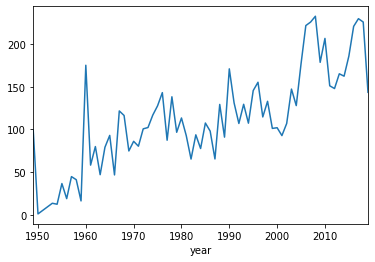

In [6]:
#call magic
%matplotlib inline

#Visualise the average number of parts by year
parts_by_year.plot()


# Lego Themes Over Years
<p>Lego blocks ship under multiple themes. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>
<p>We are going to create a summary of the number of themes shipped by year, save it as a Dataframe and print the first couple of rows</p>

In [7]:
#theme_by_year: Number of themes shipped by year
themes_by_year = pd.DataFrame(sets[['year','theme_id']].head(10))
themes_by_year.index = themes_by_year['year']
del themes_by_year['year']
themes_by_year

,theme_id
year,
1965,1
1978,84
1987,199
1979,143
1979,143
1979,143
1979,143
1978,186
1965,1


Next question left to be ans